# Table of Contents
 <p>

In [1]:
import pyflux as pf
from spikeHelper.loadSpike import loadSpikeBehav
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
spk, bhv = loadSpikeBehav('Data/rato8tudo.mat')
spikes = pd.DataFrame({i: pd.Series(np.unique(v)) for i,v in enumerate(spk.times.values)})

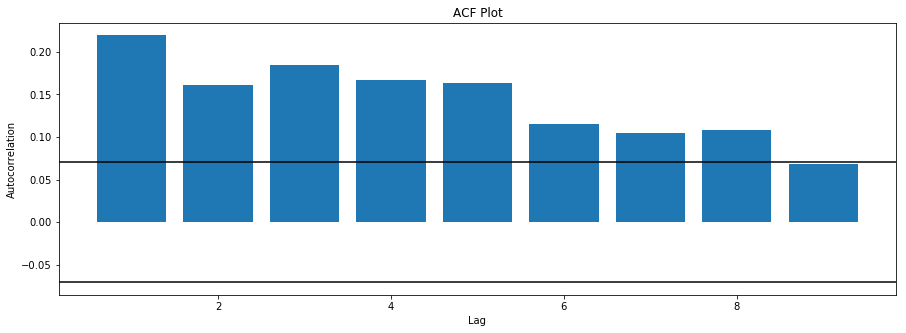

In [226]:
pf.acf_plot(bhv.duration.values)

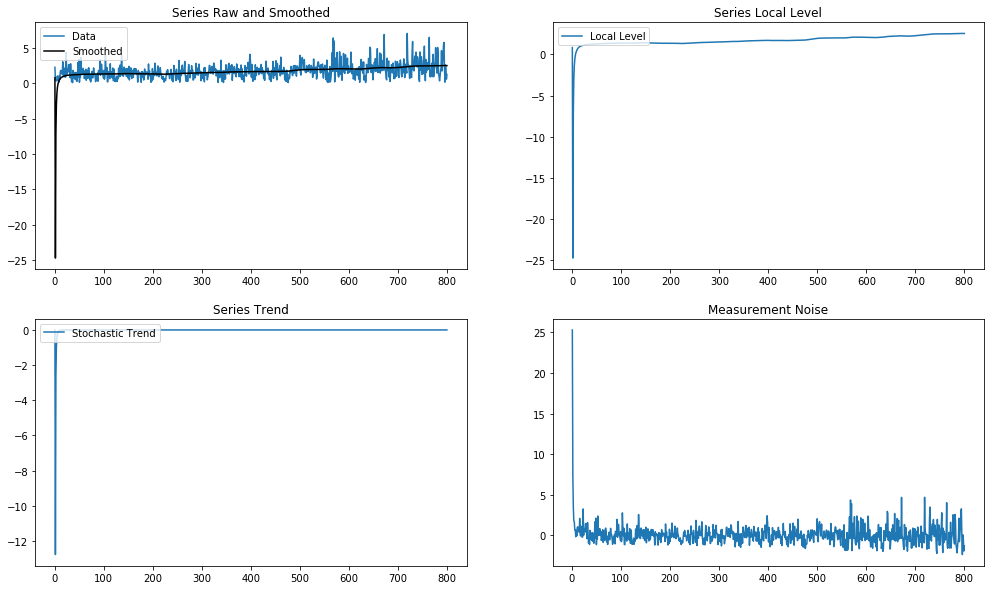

In [227]:
model = pf.LLT(data= bhv.duration.values)
model.fit()
model.plot_fit(intervals=False,figsize=(17,10))

In [228]:
bhv['reward'] = bhv['duration'] > 1.5
bhv['reward'] = bhv['reward'].apply(int)
bhv['last'] = np.r_[0, bhv.duration.values[:-1]]
bhv['lr'] = np.r_[0, bhv.reward.values[:-1]]
bhv['rewarded'] = np.r_[0, (bhv['duration']*bhv['reward']).values[:-1]]
bhv['nonrewarded'] = np.r_[0, (bhv['duration']*(1-bhv['reward'])).values[:-1]]

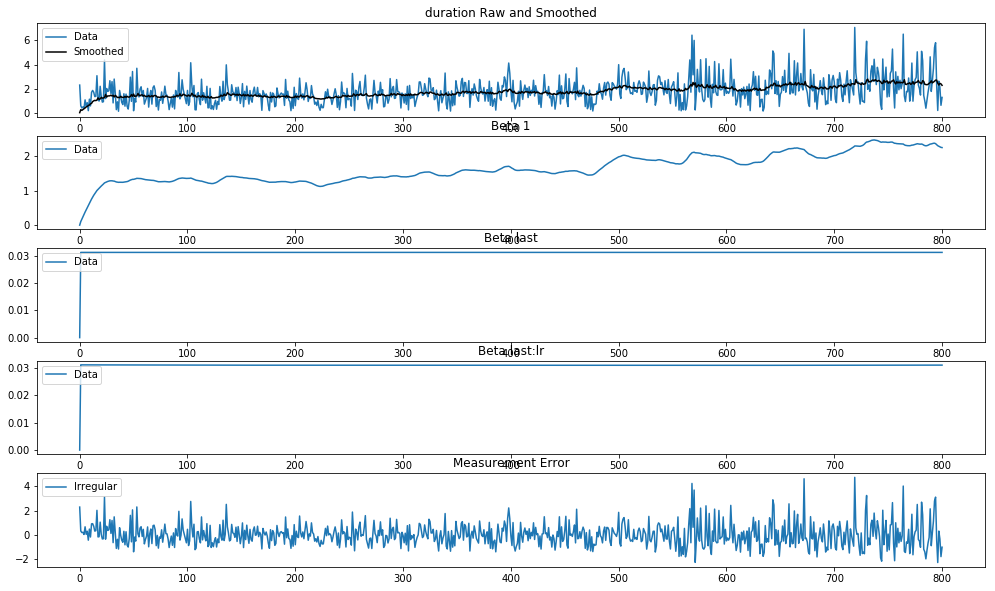

In [290]:
model = pf.DynamicGLM(data= bhv, formula = 'duration~1+last+last:lr',family=pf.Normal())
x = model.fit('MLE')
model.plot_fit(intervals=False,figsize=(17,10))

In [292]:
x.summary()

Dynamic Linear Regression                                                                                 
======================================================= ==================================================
Dependent Variable: duration                            Method: MLE                                       
Start Date: 0                                           Log Likelihood: -1149.8814                        
End Date: 800                                           AIC: 2307.7629                                    
Number of observations: 801                             BIC: 2326.5063                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.9313                                                           
Sigma^2 1                            